# Introduction to regeresion with Nueral Networks in Tensorflow

There are many definitions for regression problem but in our case, we're going to simplify it:

Predicting a numerical value based on some other combination of varibles, even shorter....Predicting a number

In [1]:
# Import tensorflow
import tensorflow as tf

In [2]:
tf.__version__

'2.15.0'

## Creating data view and fit


In [3]:

import numpy as np
import matplotlib.pyplot as plt

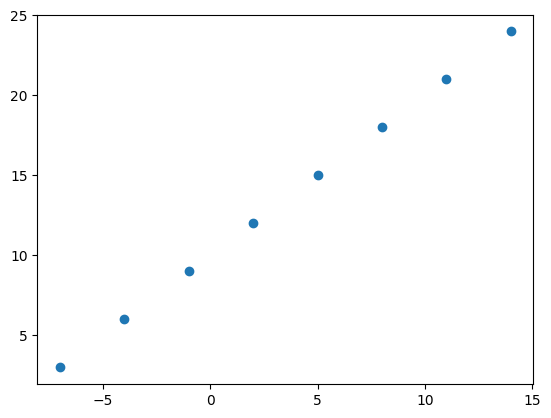

In [4]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y=np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [5]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [6]:
# Let'screate our demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
# Turn our nummpy arrays into tensors
X = tf.constant(X)
y= tf.constant(y)
X.shape, y.shape
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

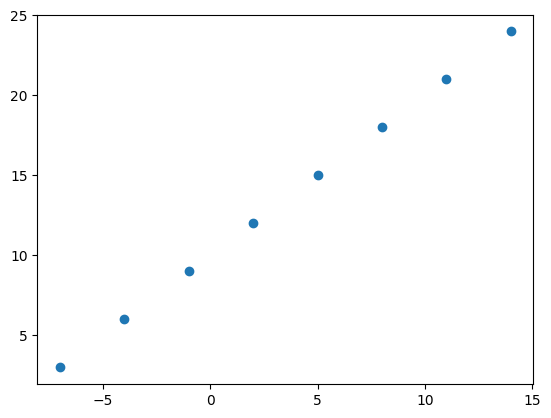

In [10]:
plt.scatter(X, y)

## Steps im modelling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning Model
2. **Compile the model** - define the loss functionn (functions tells us our model how wrong its going) and the optimizer (tells our model hoe to improve the patterns its learning) and the evaluation metrics (what we can use to interpect the performance of our model)
3. **Fitting the model** - letting the model try to find patterns between (features and labels)

In [11]:
# Set the random seed
tf.random.set_seed(42)

# Create the model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,  #mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #can repace with ["sgd"]  # stochastic gradient desent
              metrics = ["mae"]
              )

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 390ms/step - loss: 23.5418 - mae: 23.5418
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 22.0441 - mae: 22.0441
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 20.7278 - mae: 20.7278
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 19.7265 - mae: 19.7265
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 18.9967 - mae: 18.9967


In [12]:
# Try and make predict  using our model
y_pred = model.predict([17.0])


1/1 [==============================] - 0s 79ms/step


In [13]:
y_pred

array([[-18.207108]], dtype=float32)

# Improving our model

We can improve our model by, altering the steps we took to create model.

1. **Creating a model** - here we might add more layers, increase the no.of hidden units (all called nuerons) within each if hidden layers, change the activation function of each layer.
2. **Compiling a model** - her we might change the optimization function or the **learning rate** of the optimization function.
3. **Fitting the model** -  here we might fit a model for more **epochs** (leave training for longer) or more data (give the model more examples to lear from.)

In [14]:
# Let's rebuild our model

# 1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 221ms/step - loss: 11.2067 - mae: 11.2067
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0742 - mae: 11.0742
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9417 - mae: 10.9417
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8092 - mae: 10.8092
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6767 - mae: 10.6767
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5442 - mae: 10.5442
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4117 - mae: 10.4117
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2792 - mae: 10.2792
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1467 - mae: 10.1467
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0142 - mae: 10.0142
Epoch 11/100
1/1 [==============================] - 0s 7

In [15]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 100ms/step


array([[29.81378]], dtype=float32)

In [16]:
# Let's again rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 624ms/step - loss: 16.9151 - mae: 16.9151
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 16.8138 - mae: 16.8138
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 16.7128 - mae: 16.7128
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 16.6119 - mae: 16.6119
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 16.5112 - mae: 16.5112
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 16.4107 - mae: 16.4107
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 16.3103 - mae: 16.3103
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 16.2102 - mae: 16.2102
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 16.1102 - mae: 16.1102
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 16.0104 - mae: 16.0104
Epoch 11/100
1/1 [==============================

In [17]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 185ms/step


array([[14.882079]], dtype=float32)

## Evaluating a model

Tn practice, a typical workflow you'll go through when building nueral networks is

```
Build a model -> fit it ->evaluate it -> tweak a model ->
fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...


When it comes to evaluation... there are three words to memorize:

"Visualize, Visualize, Visualize"

It's good idea to visualize:

* The data - What data are we working with? What does it look like?
* The model itself - What does our model look like?
* The training model - how does a model perform while it learns?
* The predictions of the model - How do the prediction of a model line up aganist the ground truth (the original values)

In [18]:
# Make a bigger datset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
# Make labels for the dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

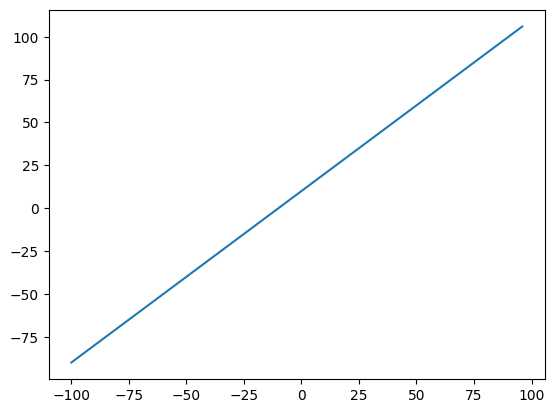

In [20]:
# Let's visualize a data
import matplotlib.pyplot as plt
plt.plot(X,y)

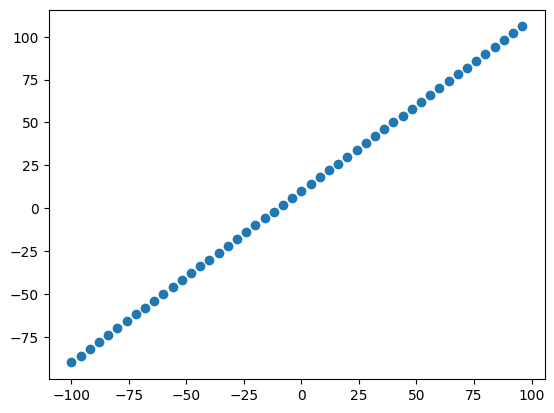

In [21]:
plt.scatter(X,y)

### The 3 sets...
* **Training set** - the model learns on this data (70%-80%)
* **Validation data** = model tuned on this data (10%-15%)
* **Test set** - model evaluated on this data (10%-15%)

In [22]:
# CHeck the length of how many samples working with
len(X)

50

In [23]:
# Split the data into trai and test set
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data


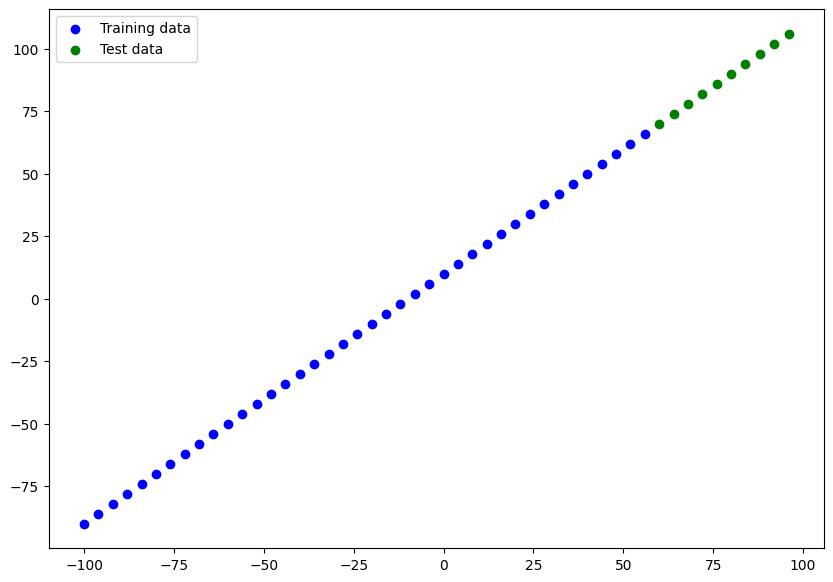

In [24]:
plt.figure(figsize=(10,7))
# Plot the training in the blue
plt.scatter(X_train, y_train, c="b", label = "Training data")

# Plot thetest data in the green
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.legend()


In [25]:
# Let's have a look a hoe to build a nueral network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(tf.expand(X_train, axis=-1), y_train, epochs = 100)

In [26]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
], name = "model_1")

# compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])


In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total no.of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non trainable params - these parameters aren't updated during training


In [28]:

# Fit the model
model.fit(X_train, y_train, epochs=99, verbose=1)

Epoch 1/99
2/2 [==============================] - 1s 9ms/step - loss: 66.0547 - mae: 66.0547
Epoch 2/99
2/2 [==============================] - 0s 6ms/step - loss: 65.3109 - mae: 65.3109
Epoch 3/99
2/2 [==============================] - 0s 8ms/step - loss: 64.5921 - mae: 64.5921
Epoch 4/99
2/2 [==============================] - 0s 6ms/step - loss: 63.8615 - mae: 63.8615
Epoch 5/99
2/2 [==============================] - 0s 6ms/step - loss: 63.1444 - mae: 63.1444
Epoch 6/99
2/2 [==============================] - 0s 6ms/step - loss: 62.4209 - mae: 62.4209
Epoch 7/99
2/2 [==============================] - 0s 6ms/step - loss: 61.6909 - mae: 61.6909
Epoch 8/99
2/2 [==============================] - 0s 6ms/step - loss: 60.9334 - mae: 60.9334
Epoch 9/99
2/2 [==============================] - 0s 5ms/step - loss: 60.2300 - mae: 60.2300
Epoch 10/99
2/2 [==============================] - 0s 6ms/step - loss: 59.5188 - mae: 59.5188
Epoch 11/99
2/2 [==============================] - 0s 6ms/step - loss

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Get summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


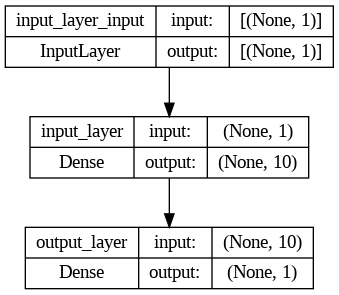

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model predictions

To Visualize predictions, its good idea to plot them aganist the ground truth labels.( `y_test` or `y_true` or `y_pred`)

In [32]:
# Make a predictions
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 52ms/step


In [33]:
y_pred

array([[52.680874],
       [56.198826],
       [59.716778],
       [63.234722],
       [66.75267 ],
       [70.27062 ],
       [73.78858 ],
       [77.306526],
       [80.82447 ],
       [84.34242 ]], dtype=float32)

In [34]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [35]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plot training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot the training in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  # Plot the testing data in blue
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #Plot the model predictions in red
  plt.scatter(test_labels, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


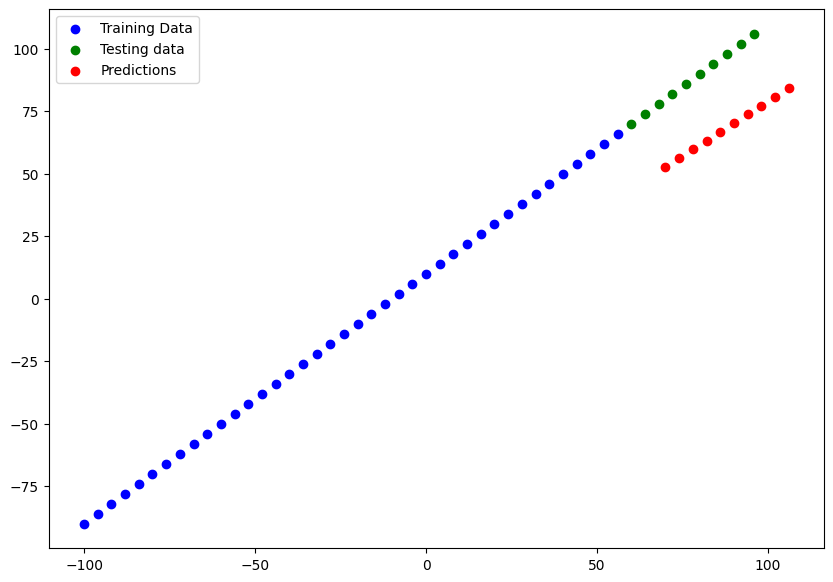

In [36]:
plot_predictions()

# Evaluating our model predictions using regression evaluation metrics

Depending on the problem you working on, there will be different evaluatio metrics to evaluate model's performance.

Since, we are working on the regression, two main metrics:

* MAE - mean absolute error, "on avarage, how wrong each of my our model predctions"
* MSE - mean square error, "square the avarage errors"

In [37]:
# Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 370ms/step - loss: 19.4883 - mae: 19.4883


[19.48834800720215, 19.48834800720215]

In [38]:
# Caluclate the mean absolute errror
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)

In [39]:
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([35.319126, 31.801174, 28.283222, 24.765278, 21.24733 , 17.783503,
       14.969134, 12.816084, 11.270212, 10.331515], dtype=float32)>

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[52.680874],
       [56.198826],
       [59.716778],
       [63.234722],
       [66.75267 ],
       [70.27062 ],
       [73.78858 ],
       [77.306526],
       [80.82447 ],
       [84.34242 ]], dtype=float32)>

In [42]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([52.680874, 56.198826, 59.716778, 63.234722, 66.75267 , 70.27062 ,
       73.78858 , 77.306526, 80.82447 , 84.34242 ], dtype=float32)>

In [43]:
# Calculate the ean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred= tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=19.488352>

In [44]:
# Calculate mean squared error
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=381.7129>

In [45]:
# Make some functions to reuse mae and mse
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

Let's do 3 modelling experiments:

1. `model_1` - same as original model, 1 layer trained for 100 epochs
2. `model_2` - 2 layers, trained for 200 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4. ... You can design by yourself

**Build model_1**

In [46]:
# Set random seed
tf.random.set_seed(42)

# 1. Craete a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 30.2759 - mae: 30.2759
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 9.6665 - mae: 9.6665
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 10.9309 - mae: 10.9309
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 9.3954 - mae: 9.3954
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.2801 - mae: 10.2801
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.5281 - mae: 9.5281
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6512 - mae: 8.6512
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0444 - mae: 9.0444
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.9669 - mae: 18.9669
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.2291 - mae: 10.2291
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - l

1/1 [==============================] - 0s 55ms/step


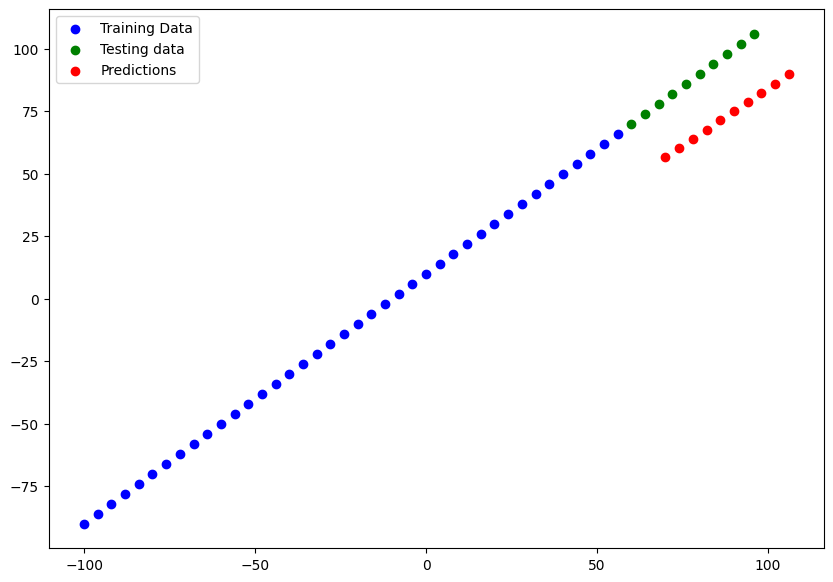

In [47]:
# Make and plot predictions with model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [48]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mse_1, mae_1

(<tf.Tensor: shape=(), dtype=float32, numpy=221.03027>,
 <tf.Tensor: shape=(), dtype=float32, numpy=14.839418>)

**Build model_2**

* 2 dense layers, trained for 100 epochs

In [49]:
# Create a random seed
tf.random.set_seed(42)

# 1. Craete a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 73.9829 - mse: 8695.3525
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 40.4908 - mse: 2595.5195
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 27.9582 - mse: 1143.6207
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 14.1150 - mse: 265.8376
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 19.3267 - mse: 508.8142
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 9.6492 - mse: 122.4956
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 10.6262 - mse: 142.3429
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 12.9432 - mse: 229.5780
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 34.0079 - mse: 1733.1595
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 23.2967 - mse: 759.0433
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 67ms/step


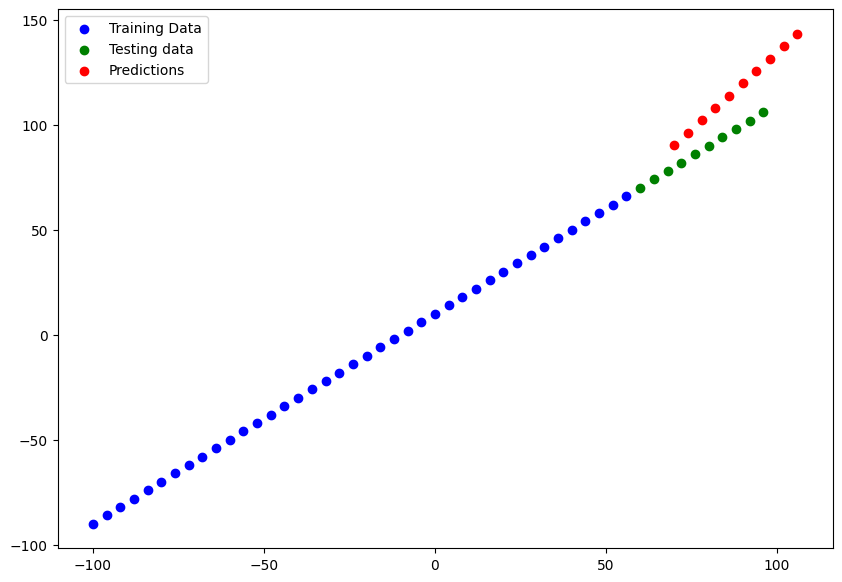

In [50]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [51]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=28.819347>,
 <tf.Tensor: shape=(), dtype=float32, numpy=860.3079>)

**Build model_3**

In [52]:
# Set the random seed
tf.random.set_seed(42)

# 1.Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 43.8167 - mae: 43.8167
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 33.0316 - mae: 33.0316
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 36.5638 - mae: 36.5638
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 30.4942 - mae: 30.4942
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 15.5359 - mae: 15.5359
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 12.3332 - mae: 12.3332
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.6263 - mae: 11.6263
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.2782 - mae: 11.2782
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 42.5524 - mae: 42.5524
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 29.6787 - mae: 29.6787
Epoch 11/500
2/2 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 85ms/step


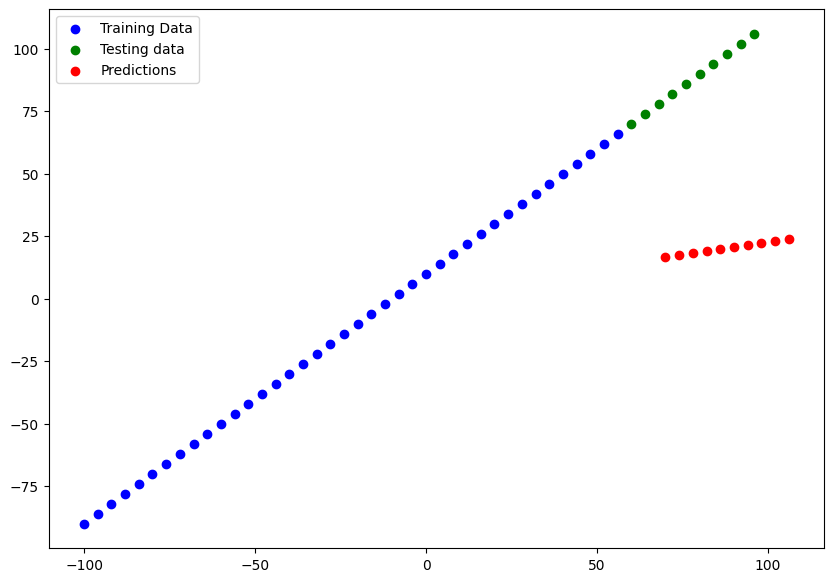

In [53]:
# Plot and make predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [54]:
# Calculate the model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.78095>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4678.583>)

## Comparing the results of our experiments

In [55]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.839418,221.030273
1,model_2,28.819347,860.307922
2,model_3,67.780952,4678.583008


In [56]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tracking our experiments

One really good habit in machine learning modelling is to track the results of our experiments

And when doping so, it can be tedious if you're running lots of experiments.

Luckily, tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* TensorBoad - a component of the TensorFlow library to help track modelling experiments
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (Plugs straight into TensorBoard).

## Saving our models

There are two main formats we can save our model's too:

1. The saveModel format
2. The HDF5 format


In [57]:
# Save model using the saveModel format
model_2.save('best_model_SaveModel_format')

In [58]:
# Save the model using HDF5 model format
model_2.save('best_model_HDF5_format.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in the save Model

In [59]:
# Load in the save model format
loaded_SaveModel_format = tf.keras.models.load_model("/content/best_model_SaveModel_format")
loaded_SaveModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
# Compae model_2 predictions with saveModel format model predictions
model_2_preds = model_2.predict(X_test)
model_2_preds

1/1 [==============================] - 0s 35ms/step


array([[ 90.273575],
       [ 96.17264 ],
       [102.07169 ],
       [107.970764],
       [113.86981 ],
       [119.76888 ],
       [125.66794 ],
       [131.567   ],
       [137.46606 ],
       [143.36513 ]], dtype=float32)

In [62]:
loaded_SaveModel_format_preds = loaded_SaveModel_format.predict(X_test)
loaded_SaveModel_format_preds

1/1 [==============================] - 0s 55ms/step


array([[ 90.273575],
       [ 96.17264 ],
       [102.07169 ],
       [107.970764],
       [113.86981 ],
       [119.76888 ],
       [125.66794 ],
       [131.567   ],
       [137.46606 ],
       [143.36513 ]], dtype=float32)

In [63]:
model_2_preds == loaded_SaveModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [64]:
# Load in a model using .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model

In [65]:
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
loaded_h5_model_preds

1/1 [==============================] - 0s 50ms/step


array([[ 90.273575],
       [ 96.17264 ],
       [102.07169 ],
       [107.970764],
       [113.86981 ],
       [119.76888 ],
       [125.66794 ],
       [131.567   ],
       [137.46606 ],
       [143.36513 ]], dtype=float32)

In [67]:
loaded_h5_model_preds == model_2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any file) from Google colab

1. files -> right click -> download
2. Use code (See below)
3. Save it to google drive by connecting Google Drive and copying it.

In [68]:
# Download a file from Google colab
from google.colab import files
# files.download("/content/best_model_HDF5_format.h5")

In [69]:
# Save the file from Google colab to Google drive
# !cp frompath topath

##A larger example

In [70]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [72]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [73]:
insurance["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [74]:
# Let's try onehot encode our DataFrame
insurance_onehot = pd.get_dummies(insurance)
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [75]:
insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [76]:
# Creating X and Y varibles
X = insurance_onehot.drop("charges", axis = 1)
Y = insurance_onehot["charges"]

In [77]:
X.head(), Y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [78]:
# Creating training and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [79]:
len(x_train), len(y_train), len(X)

(1070, 1070, 1338)

In [80]:
len(x_test), len(y_test)

(268, 268)

In [81]:
# Build a nueral network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# 3. Fit the model
insurance_model.fit(x_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8572.6045 - mae: 8572.6045
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.8691 - mae: 7886.8691
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7608.4497 - mae: 7608.4497
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7719.1626 - mae: 7719.1626
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7752.2554 - mae: 7752.2554
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7609.8481 - mae: 7609.8481
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7533.7070 - mae: 7533.7070
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7693.2061 - mae: 7693.2061
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7607.2686 - mae: 7607.2686
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7744.6587 - mae: 7744.6587

In [82]:
# Checks results of the insurance model on the test data
insurance_model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8272.5605 - mae: 8272.5605


[8272.560546875, 8272.560546875]

In [83]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

To (try) improve a model:
1. Add a extra layer with more hidden layers and optimizer Adam()
2. Train for a longer
3. ....

In [84]:
# Set therandom seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

# 3. Fit the model
insurance_model_2.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13289.5000 - mae: 13289.5000
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13099.6826 - mae: 13099.6826
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12702.8926 - mae: 12702.8926
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 11945.0439 - mae: 11945.0439
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10735.6113 - mae: 10735.6113
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9279.8369 - mae: 9279.8369
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8029.8057 - mae: 8029.8057
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7506.8843 - mae: 7506.8843
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7430.8018 - mae: 7430.8018
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7411.3667 - mae:

In [85]:
# Evaluate the larger model
insurance_model_2.evaluate(x_train, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 4801.2241 - mae: 4801.2241


[4801.22412109375, 4801.22412109375]

In [86]:
insurance_model.evaluate(x_train, y_train)

34/34 [==============================] - 0s 943us/step - loss: 8364.5781 - mae: 8364.5781


[8364.578125, 8364.578125]

In [87]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
history = insurance_model_3.fit(x_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13267.9209 - mae: 13267.9209
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13042.6338 - mae: 13042.6338
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12583.6729 - mae: 12583.6729
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 11729.4727 - mae: 11729.4727
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10415.1719 - mae: 10415.1719
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 8911.3125 - mae: 8911.3125
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7776.7148 - mae: 7776.7148
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7444.3643 - mae: 7444.3643
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7403.2290 - mae: 7403.2290
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7383.1011 - mae:

In [88]:
insurance_model_3.evaluate(x_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3478.2578 - mae: 3478.2578


[3478.2578125, 3478.2578125]

In [89]:
insurance_model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8272.5605 - mae: 8272.5605


[8272.560546875, 8272.560546875]

Text(0.5, 0, 'epochs')

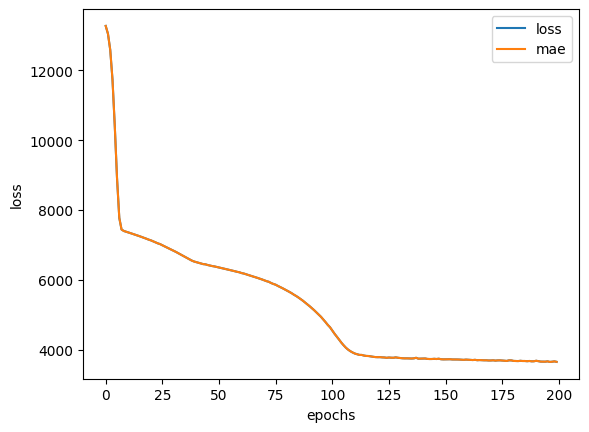

In [90]:
# Plot the history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question:** How long should you train for?

It depends... on problem you're working on.

## Preprocessing data (Normalization and standardization)

In terms of scaling values, nueral networks tend to prefer normilization.

If you're not sure on which to use, you could try on both and see which performs better.

In [91]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

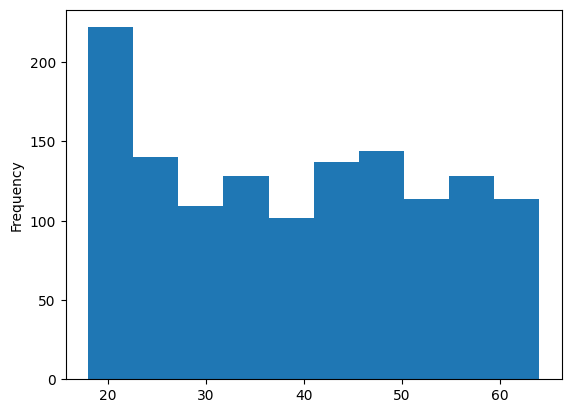

In [92]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

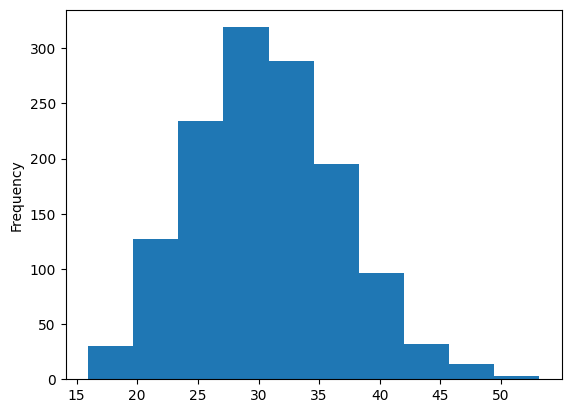

In [93]:
X["bmi"].plot(kind="hist")

In [94]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

To prepare our data, we can borrow a few classes from scikit-learn

In [96]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column a transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# X and Y
X = insurance.drop("charges", axis=1)
Y = insurance["charges"]

# Spliting the training and test datasets
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

# Fit the column transformer to training data
ct.fit(x_train)

# Transform training and test data with normalization(MinMaxScaler) and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [97]:
# What does our data look like now?
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [98]:
x_train_normal.shape, x_train.shape

((1070, 11), (1070, 6))

Our data has been normalized and one hot encoded. Let's buils our nueral model

In [99]:
# Build our nueral network model to fit on our normal data
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
insurance_model_4.fit(x_train_normal,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13344.1289 - mae: 13344.1289
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13336.4453 - mae: 13336.4453
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13316.9375 - mae: 13316.9375
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13274.8213 - mae: 13274.8213
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13198.3848 - mae: 13198.3848
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13076.5508 - mae: 13076.5508
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12899.2305 - mae: 12899.2305
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12656.3906 - mae: 12656.3906
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12337.7939 - mae: 12337.7939
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11938.27

In [100]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3440.5117 - mae: 3440.5117


[3440.51171875, 3440.51171875]